Neural Network Class Definition

In [15]:
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt


class NeuralNetwork:

    # initialize the neural network

    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

        # تعیین تعداد گره های لایه های ورودی خروجی ومخفی

        self.input_nodes = input_nodes

        self.hidden_nodes = hidden_nodes

        self.output_nodes = output_nodes

        # تعیین نرخ یادگیری

        self.learning_rate = learning_rate

        # self.w_i_h = np.random.rand(self.hidden_nodes, self.input_nodes)-0.5
        self.w_i_h = np.random.default_rng().normal(0, pow(self.input_nodes, -0.5),
                                                    (self.hidden_nodes, self.input_nodes))

        self.w_h_o = np.random.default_rng().normal(0, pow(self.hidden_nodes, -0.5),
                                                    (self.output_nodes, self.hidden_nodes))

        # self.w_h_o = np.random.rand(self.output_nodes, self.hidden_nodes)-0.5

        self.activation_function = lambda x: expit(x)

        pass

    # query the neural network

    def query(self, input_list):
        # تبدیل لیست مقادیر ورودی به آرایه دو بعدی
        inputs = np.array(input_list, ndmin=2).T  # row to column

        # محاسبه سیگنال ورودی و سپس خروجی لایه مخفی
        x_hidden = np.dot(self.w_i_h, inputs)
        o_hidden = self.activation_function(x_hidden)

        # محاسبه سیگنال ورودی و سپس خروجی لایه مخفی
        x_output = np.dot(self.w_h_o, o_hidden)
        o_output = self.activation_function(x_output)

        return o_output
        pass

    # train the neural network

    def train(self, input_list, targets_list):
        # محاسبه سیگنال‌های ورودی و خروجی لایه‌ها
        inputs = np.array(input_list, ndmin=2).T

        x_hidden = np.dot(self.w_i_h, inputs)
        o_hidden = self.activation_function(x_hidden)

        x_output = np.dot(self.w_h_o, o_hidden)
        o_output = self.activation_function(x_output)

        #محاسبه خطای شبکه بر اساس اختلاف خروجی با هدف‌ها
        targets = np.array(targets_list, ndmin=2).T
        output_errors = targets - o_output
        #پس انتشار خطای شبکه روی نورون‌های لایه مخفی
        hidden_errors = np.dot(self.w_h_o.T, output_errors)

        # محاسبه وزن‌های جدید اتصال‌ها با گرادیان کاهشی
        self.w_h_o += self.learning_rate * np.dot((output_errors * o_output * (1-o_output)), o_hidden.T)
        self.w_i_h += self.learning_rate * np.dot((hidden_errors * o_hidden * (1-o_hidden)), inputs.T)
       

Neural Network Instance Creation

In [16]:
# فراخوانی داده های اموزش از امنیست
train_file = open('mnist_train.csv', 'r')
train_list = train_file.readlines()
train_file.close()

# فراخوانی داده های آزمایش از امنیست
test_file = open('mnist_test.csv', 'r')
test_list = test_file.readlines()
test_file.close()

In [17]:
# تعیین تعدا د نورون ها در هر لایه
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# تعیین نرخ یادگیری شبکه
learning_rate = 0.15


# تعیین تعداد دوره یادگیری: تکرار یادگیری با تمام دیتاست را یک دوره گوییم
epochs = 4

# ساخت نمونه از شبکه عصبی با معماری بالا
nn = NeuralNetwork(input_nodes, hidden_nodes,
                   output_nodes, learning_rate)


# اموزش شبکه ساخته شده با داده های اموزشی امنیست
for round in range(epochs):
    for row in train_list:
        row_data = row.split(',')
        inputs = (np.asfarray(row_data[1:]) / (255.0 * 0.98)) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(row_data[0])] = 0.99
        nn.train(inputs, targets)

Test Number :  9
predicted Number :  9


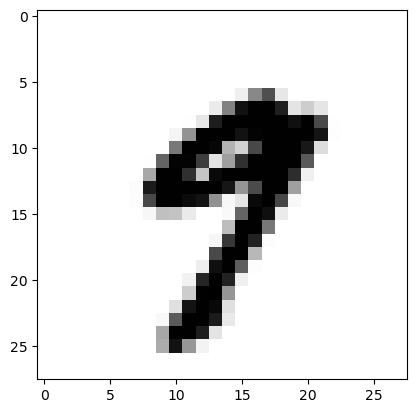

In [18]:
# آزمایش شبکه عصبی ساخته شده با یک از داده های محموعه آزمایشی

test_row_data = test_list[20].split(',')
print('Test Number : ',test_row_data[0])

image_data = np.asarray(test_row_data[1:], dtype=np.int32).reshape((28,28))
image = plt.imshow(image_data, cmap='Greys')

print("predicted Number : ",
      np.argmax(nn.query((np.asfarray(test_row_data[1:]) / (255.0 * 0.99)) + 0.01)))


In [19]:
# آزمایش عملکرد شبکه به لحاظ پیش بینی همه داده های آزمایشی
score_card = []

for row in test_list:
    row_data = row.split(',')
    target_number = int(row_data[0])
    inputs = (np.asfarray(row_data[1:]) / 255 * 0.98) + 0.01
    outputs = nn.query(inputs)
    predicted_number = np.argmax(outputs)
    # print('\nTarget Number : ', target_number)
    # print('Predicted Number : ',predicted_number)

    if target_number == predicted_number:
        score_card.append(1)
    else:
        score_card.append(0)

# print("\n\ntotal score card ", score_card)
score_card_array = np.asarray(score_card)

print('\nTotal Performance : ', score_card_array.sum() / score_card_array.size)


Total Performance :  0.9598


Text(0.5, 1.0, '3-Layer NN for MNIST HandWritten Digits Classification')

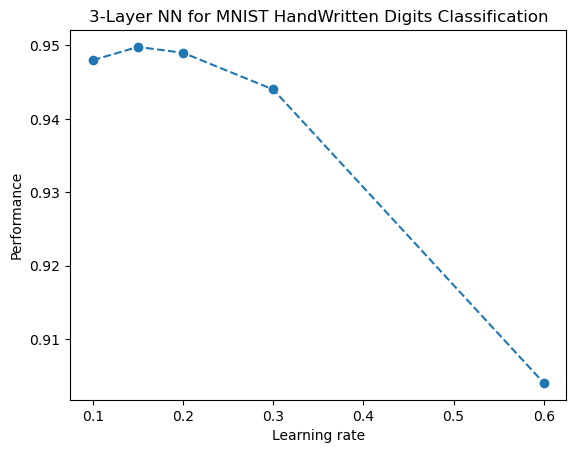

In [20]:
# بهینه یابی نرخ یادگیری

tested_learning_rate = [0.1, 0.15, 0.2, 0.3, 0.6]
result_performance = [0.948, 0.9498, 0.949, 0.944, 0.904]

fig, ax = plt.subplots()
ax.plot(tested_learning_rate, result_performance, linestyle='--', marker='o')

ax.set_xlabel('Learning rate')
ax.set_ylabel('Performance')
ax.set_title('3-Layer NN for MNIST HandWritten Digits Classification')

Training

In [21]:
train_file = open('mnist_train_100.csv', 'r')
train_list = train_file.readlines()
train_file.close()
train_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

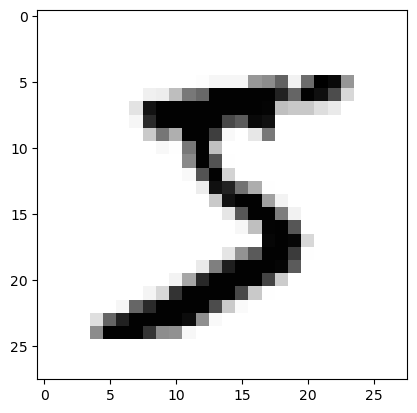

In [22]:
# نمایش عکس ها در دیتا ست mnist
row_data = train_list[0].split(',')
image_data = np.asarray(row_data[1:], dtype=np.int32).reshape((28,28))
image = plt.imshow(image_data, cmap='Greys')

In [23]:
#  مقیاس کردن داده های ورودی به محدوده 0.01 تا 1
scaled_inputs = (np.asfarray(row_data[1:]) / (255.0 * 0.99)) + 0.01 


# مقیاس کردن داده های خروجی به محدوده 0.01 تا 0.99
n_output = 10
scaled_targets = np.zeros(n_output) +0.01
scaled_targets[int(row_data[0])] = 0.99
scaled_targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])